In [2]:
import pandas as pd
import sqlite3 as sql



# Data Preprocessing

# 1. Load Listening History (Train Triplets)

In [11]:
#train_triplets --> user listening history (the 3GB one)

file_name='train_triplets.txt'
df=pd.DataFrame()
chunksize=10**8 # load by chunk to save memory
for chunk in pd.read_csv(file_name,chunksize=chunksize,sep='\t',names=['user_id','song_id','frequency']):
    df=df.append(chunk)

In [12]:
df.head()

,user_id,song_id,frequency
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1


In [13]:
# count distinct song numbers 
df.song_id.nunique()

384546


There are 384546 unique songs in the original taste profile.

In [14]:
# unique_tracks --> map song id to track id

df_track = pd.read_csv("unique_tracks.txt", header=None, sep='<SEP>',
                       names=['track_id', 'song_id', 'artist_name', 'title'])

<ipython-input-14-3619619c787c>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_track = pd.read_csv("unique_tracks.txt", header=None, sep='<SEP>',


In [15]:
len(df_track)

1000000

It includes all 100 Thousand song tracks.

In [16]:
df=df.merge(df_track,how='inner',on='song_id')
df.head()

,user_id,song_id,frequency,track_id,artist_name,title
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,TRIQAUQ128F42435AD,Jack Johnson,The Cove
1,7c86176941718984fed11b7c0674ff04c029b480,SOAKIMP12A8C130995,1,TRIQAUQ128F42435AD,Jack Johnson,The Cove
2,76235885b32c4e8c82760c340dc54f9b608d7d7e,SOAKIMP12A8C130995,3,TRIQAUQ128F42435AD,Jack Johnson,The Cove
3,250c0fa2a77bc6695046e7c47882ecd85c42d748,SOAKIMP12A8C130995,1,TRIQAUQ128F42435AD,Jack Johnson,The Cove
4,3f73f44560e822344b0fb7c6b463869743eb9860,SOAKIMP12A8C130995,6,TRIQAUQ128F42435AD,Jack Johnson,The Cove


In [17]:
df_m=pd.read_csv('mxm_779k_matches.txt',header=None ,comment='#'
                ,sep='<SEP>',names=['track_id','artist_name','title','mxm_id', 'mxm_artist_name', 'mxm_title'])
df_m = df_m[['track_id', 'mxm_id', 'mxm_artist_name', 'mxm_title']]
df_m.head()

<ipython-input-17-af3531124826>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_m=pd.read_csv('mxm_779k_matches.txt',header=None ,comment='#'


,track_id,mxm_id,mxm_artist_name,mxm_title
0,TRMMMKD128F425225D,4418550.0,Karkkiautomaatti,Tanssi vaan
1,TRMMMRX128F93187D9,8898149.0,Hudson Mohawke,No One Could Ever
2,TRMMMCH128F425532C,9239868.0,Yerba Brava,Si vos queres
3,TRMMMXN128F42936A5,5346741.0,Franz Berwald,"Symphony No. 1 in G minor ""Sinfonie Sérieuse"":..."
4,TRMMMBB12903CB7D21,2511405.0,Kris Kross,2 Da Beat Ch'yall


In [18]:
len(df_m)

779056

In [19]:
# merge on track_id
df_all=df.merge(df_m,how='left',on='track_id')
df_all.song_id.nunique()

384546

In [20]:
df_all

,user_id,song_id,frequency,track_id,artist_name,title,mxm_id,mxm_artist_name,mxm_title
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,TRIQAUQ128F42435AD,Jack Johnson,The Cove,7232629.0,Jack Johnson,The Cove
1,7c86176941718984fed11b7c0674ff04c029b480,SOAKIMP12A8C130995,1,TRIQAUQ128F42435AD,Jack Johnson,The Cove,7232629.0,Jack Johnson,The Cove
2,76235885b32c4e8c82760c340dc54f9b608d7d7e,SOAKIMP12A8C130995,3,TRIQAUQ128F42435AD,Jack Johnson,The Cove,7232629.0,Jack Johnson,The Cove
3,250c0fa2a77bc6695046e7c47882ecd85c42d748,SOAKIMP12A8C130995,1,TRIQAUQ128F42435AD,Jack Johnson,The Cove,7232629.0,Jack Johnson,The Cove
4,3f73f44560e822344b0fb7c6b463869743eb9860,SOAKIMP12A8C130995,6,TRIQAUQ128F42435AD,Jack Johnson,The Cove,7232629.0,Jack Johnson,The Cove
...,...,...,...,...,...,...,...,...,...
49664523,7e5ee985d8df64ef746a8c374357d7f39ccfcb61,SOJLGCD12A6D4F4A7C,1,TRSZCYV128F1467F70,Fad Gadget,The Ring,1480422.0,Fad Gadget,The Ring
49664524,ac96070188fa5618d5e1595937f6e02b4ab4a4fa,SONYEUK12A8C13E9A4,1,TRHPXTA128F428EFA2,Joe Veras,Mi Dueña,9631729.0,Kany García,Mi Dueña
49664525,b691b8eda35349ebaf4801c5c56a399273b6157c,SOUSSCZ12A8C131D83,2,TRRIYUS128F423F27F,Rez Band,Concert For A Queen,1899140.0,Resurrection Band,Concert for a Queen
49664526,12bce146f59c4e6d32e1a460468197cfd7cf14e8,SOKSHWF12AB018B8CC,3,TRBVDMB12903CC45BB,Tim Rushlow,Then There's Me (LP Version),1661619.0,Tim Rushlow,Then There's Me


In [21]:
# save unique id pairs as seeds
seeds=df_all[['song_id','track_id','mxm_id']]
seeds.drop_duplicates()
seeds.reset_index(drop=True, inplace=True)
seeds.to_csv("seeds.csv", index=False)

In [22]:
# save the listening history

df_all = df_all[['user_id', 'track_id', 'frequency']]

In [23]:
df_all.to_csv("listening_history.csv", index=False)

# For track information

In [24]:
df = pd.read_csv("seeds.csv")


In [25]:
# place SQL results in a DataFrame 
connection = sql.Connection("track_metadata.db")
query = 'SELECT * FROM songs'
meta = pd.read_sql_query(query, con=connection)

In [26]:
meta

,track_id,title,song_id,release,artist_id,artist_mbid,artist_name,duration,artist_familiarity,artist_hotttnesss,year,track_7digitalid,shs_perf,shs_work
0,TRMMMYQ128F932D901,Silent Night,SOQMMHC12AB0180CB8,Monster Ballads X-Mas,ARYZTJS1187B98C555,357ff05d-848a-44cf-b608-cb34b5701ae5,Faster Pussy cat,252.05506,0.649822,0.394032,2003,7032331,-1,0
1,TRMMMKD128F425225D,Tanssi vaan,SOVFVAK12A8C1350D9,Karkuteillä,ARMVN3U1187FB3A1EB,8d7ef530-a6fd-4f8f-b2e2-74aec765e0f9,Karkkiautomaatti,156.55138,0.439604,0.356992,1995,1514808,-1,0
2,TRMMMRX128F93187D9,No One Could Ever,SOGTUKN12AB017F4F1,Butter,ARGEKB01187FB50750,3d403d44-36ce-465c-ad43-ae877e65adc4,Hudson Mohawke,138.97098,0.643681,0.437504,2006,6945353,-1,0
3,TRMMMCH128F425532C,Si Vos Querés,SOBNYVR12A8C13558C,De Culo,ARNWYLR1187B9B2F9C,12be7648-7094-495f-90e6-df4189d68615,Yerba Brava,145.05751,0.448501,0.372349,2003,2168257,-1,0
4,TRMMMWA128F426B589,Tangle Of Aspens,SOHSBXH12A8C13B0DF,Rene Ablaze Presents Winter Sessions,AREQDTE1269FB37231,,Der Mystic,514.29832,0.000000,0.000000,0,2264873,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,TRYYYUS12903CD2DF0,O Samba Da Vida,SOTXAME12AB018F136,Pacha V.I.P.,AR7Z4J81187FB3FC59,9d50cb20-7e42-45cc-b0dd-154c3e92a577,Kiko Navarro,217.44281,0.528617,0.411595,0,7522478,-1,0
999996,TRYYYJO128F426DA37,Jago Chhadeo,SOXQYIQ12A8C137FBB,Naale Baba Lassi Pee Gya,ART5FZD1187B9A7FCF,2357c400-9109-42b6-b3fe-9e2d9f8e3872,Kuldeep Manak,244.16608,0.401500,0.374866,0,1632096,-1,0
999997,TRYYYMG128F4260ECA,Novemba,SOHODZI12A8C137BB3,Dub_Connected: electronic music,ARZ3R6M1187B9AF750,8b97e9c8-61f5-4615-9a96-276f24204e34,Gabriel Le Mar,553.03791,0.556918,0.336914,0,2219291,-1,0
999998,TRYYYDJ128F9310A21,Faraday,SOLXGOR12A81C21EB7,The Trance Collection Vol. 2,ARCMCOK1187B9B1073,4ac5f3de-c5ad-475e-ad50-41f1ef9dba20,Elude,484.51873,0.403668,0.256935,0,5472456,-1,0


In [27]:
meta = meta[meta.track_id.isin(df.track_id)].reset_index(drop=True)

# drop last three columns
meta = meta.iloc[:, :-3]

meta.head()

,track_id,title,song_id,release,artist_id,artist_mbid,artist_name,duration,artist_familiarity,artist_hotttnesss,year
0,TRMMMYQ128F932D901,Silent Night,SOQMMHC12AB0180CB8,Monster Ballads X-Mas,ARYZTJS1187B98C555,357ff05d-848a-44cf-b608-cb34b5701ae5,Faster Pussy cat,252.05506,0.649822,0.394032,2003
1,TRMMMCH128F425532C,Si Vos Querés,SOBNYVR12A8C13558C,De Culo,ARNWYLR1187B9B2F9C,12be7648-7094-495f-90e6-df4189d68615,Yerba Brava,145.05751,0.448501,0.372349,2003
2,TRMMMNS128F93548E1,L'antarctique,SOYGNWH12AB018191E,Des cobras des tarentules,AR59BSJ1187FB4474F,891fccfc-24c1-4bfd-bf49-c736e59e443f,3 Gars Su'l Sofa,68.96281,0.555014,0.352949,2007
3,TRMMMXI128F4285A3F,N Gana,SOGPCJI12A8C13CCA0,Afropea 3 - Telling Stories To The Sea,ARBAMQB1187FB3C650,0bb5e108-b41d-46cd-969e-69d34d1acdfe,Waldemar Bastos,273.18812,0.543690,0.373679,0
4,TRMMMKI128F931D80D,006,SOSDCFG12AB0184647,Lena 20 År,ARSB5591187B99A848,fba3e876-68f1-4a1f-99d9-c604480202ba,Lena Philipsson,262.26893,0.529819,0.410229,1998


In [28]:
# save metadata
meta.to_csv("tracks_metadata.csv", index=False)

# For Artists

In [29]:
# artist tags database

connection = sql.Connection("artist_term.db")
query = 'SELECT * FROM artist_mbtag'
artist = pd.read_sql_query(query, con=connection)
artist

,artist_id,mbtag
0,AR002UA1187B9A637D,uk
1,AR002UA1187B9A637D,rock
2,AR002UA1187B9A637D,garage rock
3,AR006821187FB5192B,bass
4,AR00A6H1187FB5402A,detroit
...,...,...
24772,ARZZMWO1187B9AFB36,usa
24773,ARZZMWO1187B9AFB36,metal
24774,ARZZXT51187FB4627E,classic pop and rock
24775,ARZZYRB1187B99D0B6,jazz


In [30]:
# combine rows into lists

artist = artist.groupby("artist_id")['mbtag'].apply(list).reset_index(name='tags')

In [31]:
artist

,artist_id,tags
0,AR002UA1187B9A637D,"[uk, rock, garage rock]"
1,AR006821187FB5192B,[bass]
2,AR00A6H1187FB5402A,"[detroit, punk, michigan, usa]"
3,AR00B1I1187FB433EB,"[european, swedish, classic pop and rock]"
4,AR00FVC1187FB5BE3E,"[german, berlin]"
...,...,...
8833,ARZZ8O71187FB45FA4,"[punk, france]"
8834,ARZZMLS1187FB4F46C,[rock and indie]
8835,ARZZMWO1187B9AFB36,"[grindcore, new york, usa, metal]"
8836,ARZZXT51187FB4627E,[classic pop and rock]


In [32]:
artist2=pd.read_csv('artist_location.txt', header=None,
                   sep='<SEP>', names=['artist_id','lng','lat','artist_name','place'])

<ipython-input-32-3d265d08f70d>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  artist2=pd.read_csv('artist_location.txt', header=None,


In [33]:
artist2

,artist_id,lng,lat,artist_name,place
0,ARZGXZG1187B9B56B6,-16.96595,-61.14804,Endless Blue,Santa Cruz
1,AR8K6F31187B99C2BC,46.44231,-93.36586,Go Fish,"Twin Cities, MN"
2,ARHJJ771187FB5B581,51.59678,-0.33556,Screaming Lord Sutch,"Harrow, Middlesex, England"
3,ARJ8YLL1187FB3CA93,40.69626,-73.83301,Morton Gould,"Richmond Hill, NY"
4,ARYBAGV11ECC836DAC,43.58828,-79.64372,Crash Parallel,Mississauga
...,...,...,...,...,...
13845,ARY5A5U1187B9B2C08,34.05349,-118.24532,Rose Royce,"Los Angeles, CA"
13846,AR02X7I1187FB41C6F,48.85692,2.34121,Shonky,Paris/Berlin
13847,ARJWB0K1187FB4D6ED,-36.55865,145.46900,Xavier Rudd,"Victoria, Australia"
13848,ARNEL2O1187FB4421A,33.89627,-89.00018,Bukka White,"Houston, MS"


In [34]:
artist = artist.merge(artist2, how='left', on='artist_id')
# select artist in our listening history

artist = artist[artist.artist_id.isin(meta.artist_id)].reset_index(drop=True)
artist.drop(columns='artist_name', axis=1, inplace=True)

In [35]:
artist

,artist_id,tags,lng,lat,place
0,AR00B1I1187FB433EB,"[european, swedish, classic pop and rock]",NaN,NaN,NaN
1,AR00FVC1187FB5BE3E,"[german, berlin]",25.67084,-100.30953,"Monterrey, NL, México"
2,AR00IKC1187FB37BD5,"[uk, scotland, edinburgh, punk, anarcho]",NaN,NaN,NaN
3,AR00M9H1187B9B59CA,[virgin islands reggae],47.67885,-122.20724,"Kirkland, WA"
4,AR00P3M1187FB5428C,[british],NaN,NaN,NaN
...,...,...,...,...,...
7709,ARZZ8261187FB48F00,"[slam poetry, french, france, francophone, spo...",NaN,NaN,NaN
7710,ARZZMLS1187FB4F46C,[rock and indie],30.42084,-87.21724,"Pensacola, FL"
7711,ARZZMWO1187B9AFB36,"[grindcore, new york, usa, metal]",40.71455,-74.00712,"New York, NY"
7712,ARZZXT51187FB4627E,[classic pop and rock],NaN,NaN,NaN


In [36]:
artist.to_csv("artist.csv", index=False)

# Lyrics

In [37]:
connection = sql.Connection("lyrics.db")
query = 'SELECT * FROM words'
words = pd.read_sql_query(query, con=connection)

In [38]:
words

,word
0,i
1,the
2,you
3,to
4,and
...,...
4995,santo
4996,pe
4997,gee
4998,colleg


In [39]:
words.to_csv("word_list.csv")


In [40]:
query = 'SELECT * FROM lyrics'
lyrics = pd.read_sql_query(query, con=connection)

In [41]:
lyrics.head(10)

,track_id,mxm_tid,word,count,is_test
0,TRAAAAV128F421A322,4623710,i,6,0
1,TRAAAAV128F421A322,4623710,the,4,0
2,TRAAAAV128F421A322,4623710,you,2,0
3,TRAAAAV128F421A322,4623710,to,2,0
4,TRAAAAV128F421A322,4623710,and,5,0
5,TRAAAAV128F421A322,4623710,a,3,0
6,TRAAAAV128F421A322,4623710,me,1,0
7,TRAAAAV128F421A322,4623710,it,1,0
8,TRAAAAV128F421A322,4623710,my,1,0
9,TRAAAAV128F421A322,4623710,is,2,0


In [42]:
lyrics.to_csv("lyrics.csv")

# Preprocessing

In [43]:
df=pd.read_csv("lyrics.csv")
track=pd.read_csv("tracks_metadata.csv")

In [44]:
df.head()

,Unnamed: 0,track_id,mxm_tid,word,count,is_test
0,0,TRAAAAV128F421A322,4623710,i,6,0
1,1,TRAAAAV128F421A322,4623710,the,4,0
2,2,TRAAAAV128F421A322,4623710,you,2,0
3,3,TRAAAAV128F421A322,4623710,to,2,0
4,4,TRAAAAV128F421A322,4623710,and,5,0


In [45]:
track.head()

,track_id,title,song_id,release,artist_id,artist_mbid,artist_name,duration,artist_familiarity,artist_hotttnesss,year
0,TRMMMYQ128F932D901,Silent Night,SOQMMHC12AB0180CB8,Monster Ballads X-Mas,ARYZTJS1187B98C555,357ff05d-848a-44cf-b608-cb34b5701ae5,Faster Pussy cat,252.05506,0.649822,0.394032,2003
1,TRMMMCH128F425532C,Si Vos Querés,SOBNYVR12A8C13558C,De Culo,ARNWYLR1187B9B2F9C,12be7648-7094-495f-90e6-df4189d68615,Yerba Brava,145.05751,0.448501,0.372349,2003
2,TRMMMNS128F93548E1,L'antarctique,SOYGNWH12AB018191E,Des cobras des tarentules,AR59BSJ1187FB4474F,891fccfc-24c1-4bfd-bf49-c736e59e443f,3 Gars Su'l Sofa,68.96281,0.555014,0.352949,2007
3,TRMMMXI128F4285A3F,N Gana,SOGPCJI12A8C13CCA0,Afropea 3 - Telling Stories To The Sea,ARBAMQB1187FB3C650,0bb5e108-b41d-46cd-969e-69d34d1acdfe,Waldemar Bastos,273.18812,0.543690,0.373679,0
4,TRMMMKI128F931D80D,006,SOSDCFG12AB0184647,Lena 20 År,ARSB5591187B99A848,fba3e876-68f1-4a1f-99d9-c604480202ba,Lena Philipsson,262.26893,0.529819,0.410229,1998


# Lyrics Preprocessing

1. Data Consolidation

Because the lyrics are in the form of tokenization for each unique track, I aggregate all the tokens together for every track. Now, each track has a full version of lyric

In [46]:
df['words']=df.apply(lambda row: (row['word']+' ')*row['count'],axis=1)
df_new = df[['track_id','words']].groupby('track_id')['words'].apply(lambda x: ' '.join(x)).reset_index(name='lyric')

In [5]:
# Import nltk package
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/elyasm/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/elyasm/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/elyasm/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [48]:
stopwords = stopwords.words('english')

In [49]:
#Clean text
import re
from nltk.corpus import stopwords

# Define a function to clean text
def preprocessing_text(lyric):
    my_stopwords = stopwords.words('english')
    wnl = nltk.WordNetLemmatizer()
    tag_remove = re.compile(r'<[^>]+>')
    review = tag_remove.sub('', lyric)
    tokens = nltk.word_tokenize(lyric)
    words =  [w.lower() for w in tokens if w.isalpha() if w.lower() not in my_stopwords]
    stem = [wnl.lemmatize(w) for w in words]
    clean_text = ' '.join(w for w in stem)
    return clean_text

In [50]:
df_new['lyric'] = df_new['lyric'].apply(lambda x:preprocessing_text(x))  # Apply function to preprocess lyrics

In [51]:
df_new  # Show preprocessed lyrics

,track_id,lyric
0,TRAAAAV128F421A322,like like de got would seem someon understand ...
1,TRAAABD128F429CF47,know know know know know time time time la la ...
2,TRAAAED128E0783FAB,love love love love love love love love love l...
3,TRAAAEF128F4273421,know got got got feel let would would would ey...
4,TRAAAEW128F42930C0,like take would wo someth stay burn burn burn ...
...,...,...
237657,TRZZZXA128F428ED56,time la get eye think give dream wo wo head so...
237658,TRZZZXV128F4289747,know like like like time get get get never bac...
237659,TRZZZYV128F92E996D,get get get get get get get get get get get ge...
237660,TRZZZYX128F92D32C6,know know time time time go go go go go go go ...


In [52]:
text = ' '.join(df_new['lyric'])         # Joining all the lyrics together

# Lyrics Visulization with WordCloud

In this section, I visualized the top popular lyrics of all time with WordCloud.

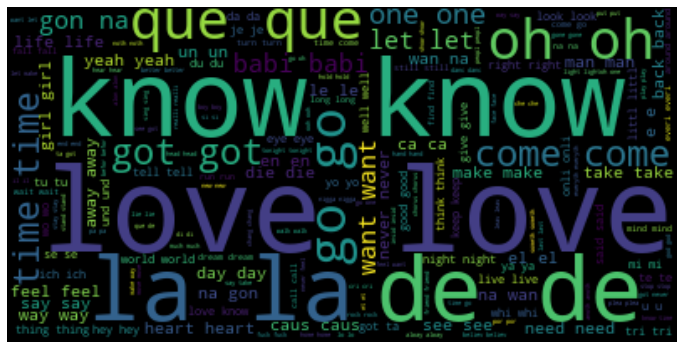

In [53]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
wordCloud_caption = WordCloud(stopwords = STOPWORDS,
                             background_color = 'black',
                             max_words = len(text)).generate(text)

plt.figure(figsize=(12,9))
plt.clf()
plt.imshow(wordCloud_caption,interpolation='bilinear')
plt.axis('off')
(-0.5, 399.5, 199.5, -0.5)
plt.savefig('caption.png')
plt.show()

# Tokenization Text

In [54]:
text_token = [i for i in text.split(',') if i !='']

# Visualize top 30 words popular in lyrics for all time

/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


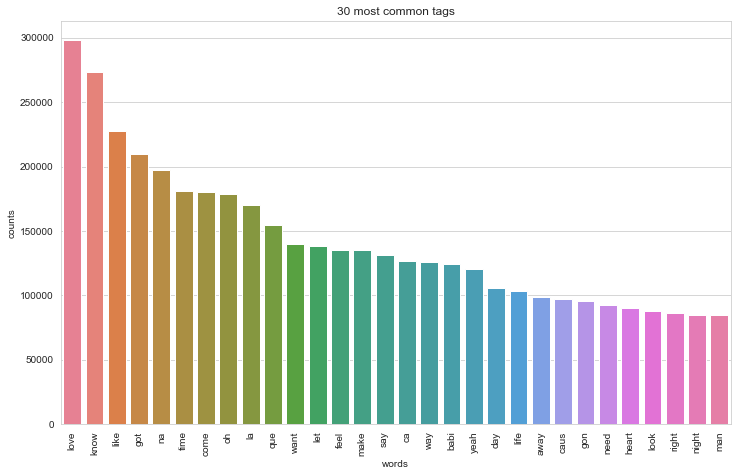

In [55]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function

def plot_30_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:30]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(12, 12/1.6180))
    plt.subplot(title='30 most common tags')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(text_token)
# Visualise the 30 most common words
plot_30_most_common_words(count_data, count_vectorizer)

# Visualize lyric trends over time (1950s - 2000s)

Prepare data for visualization:

Join year and track ID together

Split the data by years (2000s, 90s, 80s, 70s, 60s, 50s)

In [56]:
# Merge year and track ID together
df_lyrics = df_new.merge(track[['track_id','year']], how="inner", on="track_id")

In [57]:
df_lyrics.head()


,track_id,lyric,year
0,TRAAAAV128F421A322,like like de got would seem someon understand ...,2005
1,TRAAABD128F429CF47,know know know know know time time time la la ...,1969
2,TRAAAED128E0783FAB,love love love love love love love love love l...,0
3,TRAAAEW128F42930C0,like take would wo someth stay burn burn burn ...,0
4,TRAAAFD128F92F423A,one got never feel way way take would away awa...,2007


In [58]:
# Split the data by years
# 2000s
df_2000 = df_lyrics[df_lyrics['year']>=2000]
# 1990s
df_1990 = df_lyrics[(df_lyrics['year']<2000) & (df_lyrics['year']>=1990)]
# 1980s
df_1980 = df_lyrics[(df_lyrics['year']<1990) & (df_lyrics['year']>=1980)]
# 1970
df_1970 = df_lyrics[(df_lyrics['year']<1980) & (df_lyrics['year']>=1970)]
# 1960
df_1960 = df_lyrics[(df_lyrics['year']<1970) & (df_lyrics['year']>=1960)]
# 1950 or smaller
df_1950 = df_lyrics[(df_lyrics['year']<1960)]

# Top 30 popular words in lyric of the 2000s

/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


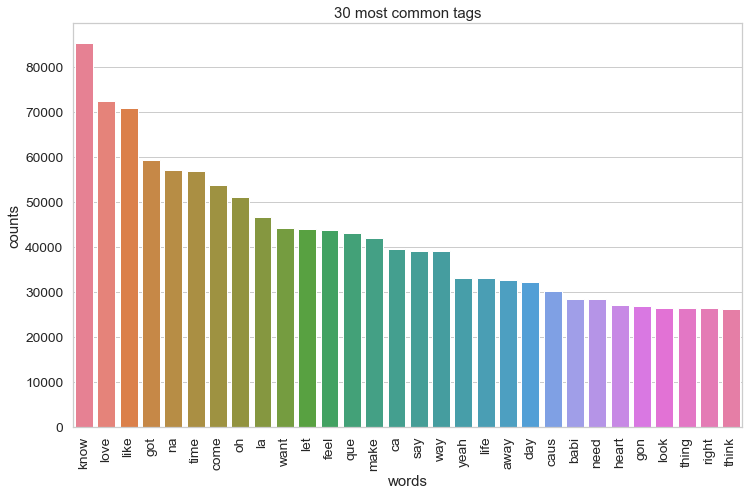

In [59]:
# Merge lyrics of 2000-2011
text_2000 = ' '.join(df_2000['lyric'])
# Tokenization
text_token_2000 = [i for i in text_2000.split(',') if i !='']
# Fit and transform the processed titles
count_data_2000 = count_vectorizer.fit_transform(text_token_2000)
# Visualise the 30 most common words
plot_30_most_common_words(count_data_2000, count_vectorizer)

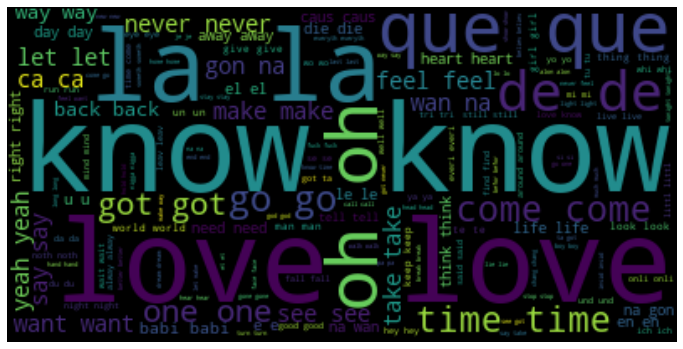

In [60]:
wordCloud_2000 = WordCloud(stopwords = STOPWORDS,
                             background_color = 'black',
                             max_words = 300).generate(text_2000)

plt.figure(figsize=(12,9))
plt.clf()
plt.imshow(wordCloud_2000,interpolation='bilinear')
plt.axis('off')
(-0.5, 399.5, 199.5, -0.5)
plt.savefig('caption.png')
plt.show()

# Top 30 popular words in lyric of the 90s

/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


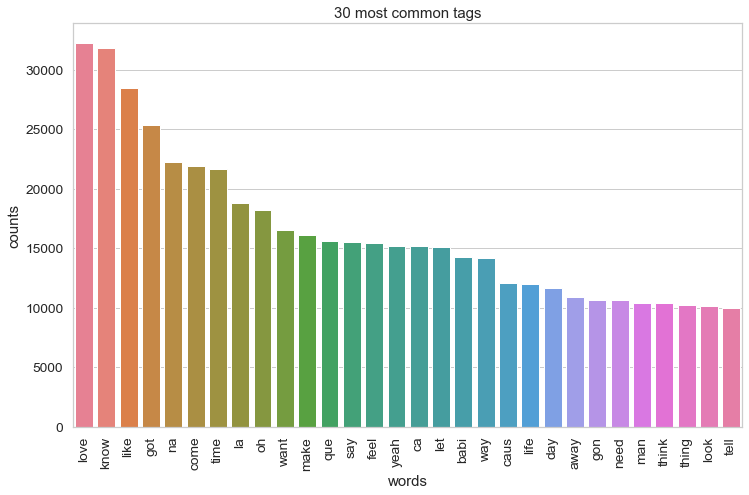

In [61]:

# Combine all the lyrics into one text
text_1990 = ' '.join(df_1990['lyric'])
# Tokenization
text_token_1990 = [i for i in text_1990.split(',') if i !='']
# Fit and transform the processed titles
count_data_1990 = count_vectorizer.fit_transform(text_token_1990)
# Visualise the 30 most common words
plot_30_most_common_words(count_data_1990, count_vectorizer)

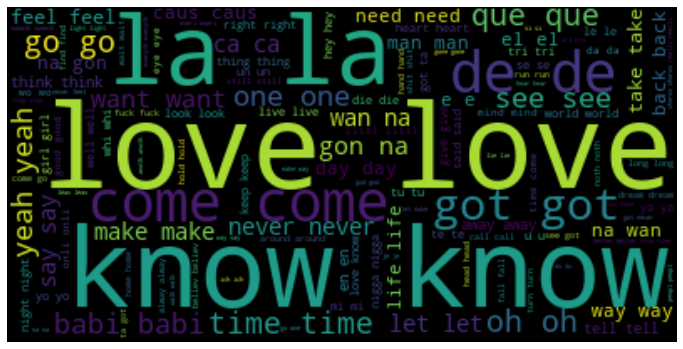

In [62]:

wordCloud_1990 = WordCloud(stopwords = STOPWORDS,
                             background_color = 'black',
                             max_words = 300).generate(text_1990)

plt.figure(figsize=(12,9))
plt.clf()
plt.imshow(wordCloud_1990,interpolation='bilinear')
plt.axis('off')
(-0.5, 399.5, 199.5, -0.5)
plt.show()

# Top 30 opular words in lyric of the 80s

/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


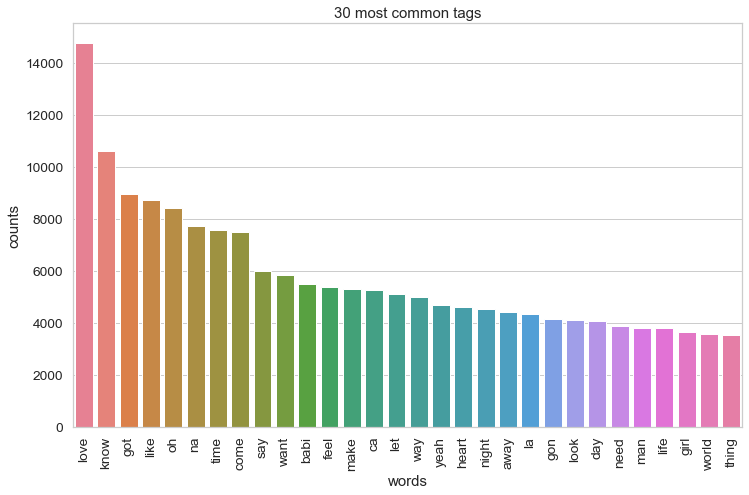

In [63]:
# Combine all the lyrics into one text
text_1980 = ' '.join(df_1980['lyric'])
# Tokenization
text_token_1980 = [i for i in text_1980.split(',') if i !='']
# Fit and transform the processed titles
count_data_1980 = count_vectorizer.fit_transform(text_token_1980)
# Visualise the 30 most common words
plot_30_most_common_words(count_data_1980, count_vectorizer)

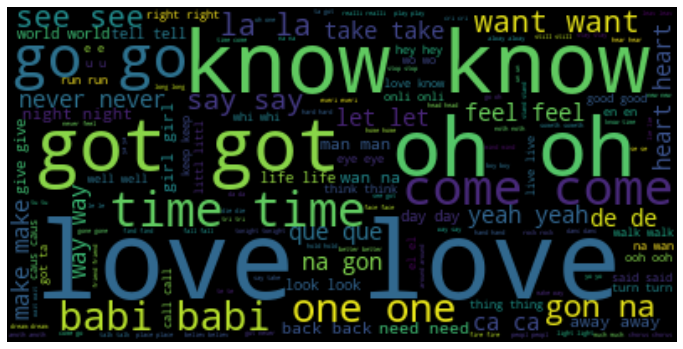

In [64]:
wordCloud_1980 = WordCloud(stopwords = STOPWORDS,
                             background_color = 'black',
                             max_words = 300).generate(text_1980)

plt.figure(figsize=(12,9))
plt.clf()
plt.imshow(wordCloud_1980,interpolation='bilinear')
plt.axis('off')
(-0.5, 399.5, 199.5, -0.5)
plt.show()

# Top 30 popular words in lyric of the 70s

/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


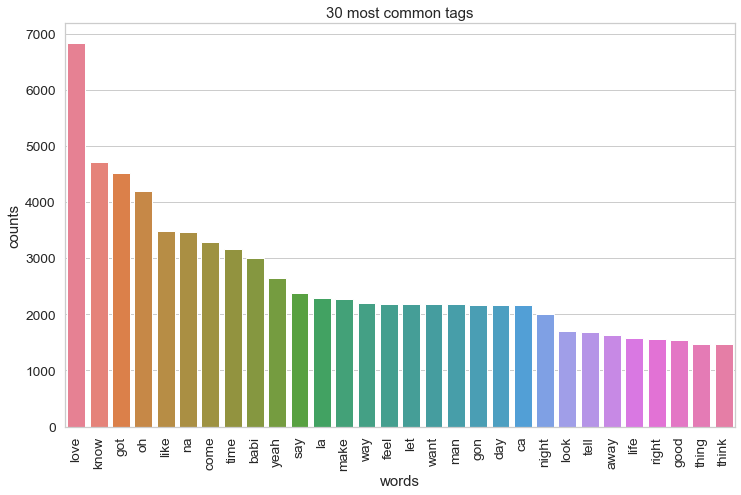

In [65]:
# Combine all the lyrics into one text
text_1970 = ' '.join(df_1970['lyric'])
# Tokenization
text_token_1970 = [i for i in text_1970.split(',') if i !='']
# Fit and transform the processed titles
count_data_1970 = count_vectorizer.fit_transform(text_token_1970)
# Visualise the 30 most common words
plot_30_most_common_words(count_data_1970, count_vectorizer)

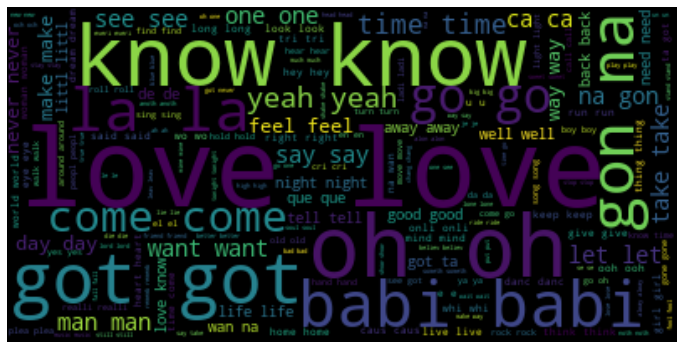

In [66]:

wordCloud_1970 = WordCloud(stopwords = STOPWORDS,
                             background_color = 'black',
                             max_words = 300).generate(text_1970)

plt.figure(figsize=(12,9))
plt.clf()
plt.imshow(wordCloud_1970,interpolation='bilinear')
plt.axis('off')
(-0.5, 399.5, 199.5, -0.5)
plt.show()

# Top 30 popular words in lyric of the 60s

/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


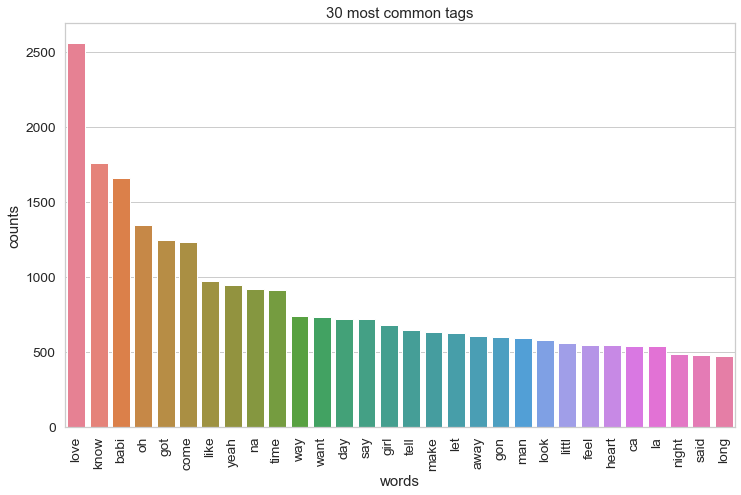

In [67]:
# Combine all the lyrics into one text
text_1960 = ' '.join(df_1960['lyric'])
# Tokenization
text_token_1960 = [i for i in text_1960.split(',') if i !='']
# Fit and transform the processed titles
count_data_1960 = count_vectorizer.fit_transform(text_token_1960)
# Visualise the 30 most common words
plot_30_most_common_words(count_data_1960, count_vectorizer)

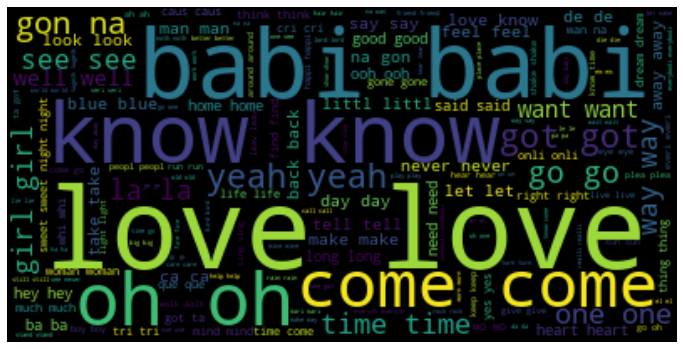

In [68]:
wordCloud_1960 = WordCloud(stopwords = STOPWORDS,
                             background_color = 'black',
                             max_words = 300).generate(text_1960)

plt.figure(figsize=(12,9))
plt.clf()
plt.imshow(wordCloud_1960,interpolation='bilinear')
plt.axis('off')
(-0.5, 399.5, 199.5, -0.5)
plt.show()

# Top 30 popular words in lyric of the 50s or less

/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


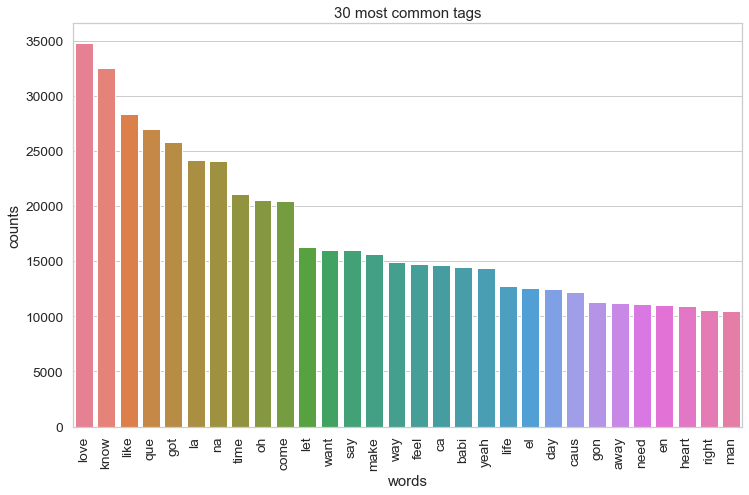

In [69]:
# Combine all the lyrics into one text
text_1950 = ' '.join(df_1950['lyric'])
# Tokenization
text_token_1950 = [i for i in text_1950.split(',') if i !='']
# Fit and transform the processed titles
count_data_1950 = count_vectorizer.fit_transform(text_token_1950)
# Visualise the 30 most common words
plot_30_most_common_words(count_data_1950, count_vectorizer)


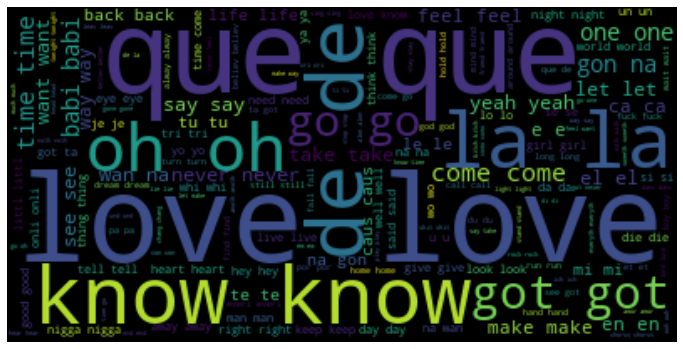

In [71]:
wordCloud_1950 = WordCloud(stopwords = STOPWORDS,
                             background_color = 'black',
                             max_words = 300).generate(text_1950)

plt.figure(figsize=(12,9))
plt.clf()
plt.imshow(wordCloud_1950,interpolation='bilinear')
plt.axis('off')
(-0.5, 399.5, 199.5, -0.5)
plt.show()

# Lyric-based Recommendation System

TFIDF

Latent DIrichlet Allocation (LDA)

Artist Similarity

In [3]:
data = pd.read_csv('lyrics.csv')
print(data.shape)
data.head()

(19045332, 6)


,Unnamed: 0,track_id,mxm_tid,word,count,is_test
0,0,TRAAAAV128F421A322,4623710,i,6,0
1,1,TRAAAAV128F421A322,4623710,the,4,0
2,2,TRAAAAV128F421A322,4623710,you,2,0
3,3,TRAAAAV128F421A322,4623710,to,2,0
4,4,TRAAAAV128F421A322,4623710,and,5,0


Remove stopwords for lyrics

In [6]:
# stop words
#nltk.download('stopwords')
stoplist = stopwords.words('english')
stoplist.extend(['oh','yeah','na','ya','us','make','oooo','right','gotta','wo','ong','ou','x5','uhm','em','x8','x2','x4',' gonna','word','name','come',
                   'oooooooh','got','would','easili','de','frown','wanna','wooo','go','back','said','come','things','get','one','place','would','like','cause'])
                 
                 
                 
                 
                 

In [7]:
# remove stopwords
data['stop'] = data.apply(lambda row: row['word'] in stoplist, axis=1)

In [8]:
data.head()

,Unnamed: 0,track_id,mxm_tid,word,count,is_test,stop
0,0,TRAAAAV128F421A322,4623710,i,6,0,True
1,1,TRAAAAV128F421A322,4623710,the,4,0,True
2,2,TRAAAAV128F421A322,4623710,you,2,0,True
3,3,TRAAAAV128F421A322,4623710,to,2,0,True
4,4,TRAAAAV128F421A322,4623710,and,5,0,True


In [9]:
lyric = data.loc[data['stop'] == False, :]

In [10]:
lyric


,Unnamed: 0,track_id,mxm_tid,word,count,is_test,stop
31,31,TRAAAAV128F421A322,4623710,seem,1,0,False
32,32,TRAAAAV128F421A322,4623710,someon,1,0,False
33,33,TRAAAAV128F421A322,4623710,understand,1,0,False
34,34,TRAAAAV128F421A322,4623710,pass,1,0,False
35,35,TRAAAAV128F421A322,4623710,river,1,0,False
...,...,...,...,...,...,...,...
19045325,19045325,TRZZZZD128F4236844,2466899,clown,1,1,False
19045326,19045326,TRZZZZD128F4236844,2466899,fan,1,1,False
19045328,19045328,TRZZZZD128F4236844,2466899,disast,1,1,False
19045330,19045330,TRZZZZD128F4236844,2466899,teas,1,1,False


In [11]:
lyric_nostop = lyric.iloc[:, 1:5]
lyric_nostop.reset_index(drop=True, inplace=True)


In [12]:
lyric_nostop


,track_id,mxm_tid,word,count
0,TRAAAAV128F421A322,4623710,seem,1
1,TRAAAAV128F421A322,4623710,someon,1
2,TRAAAAV128F421A322,4623710,understand,1
3,TRAAAAV128F421A322,4623710,pass,1
4,TRAAAAV128F421A322,4623710,river,1
...,...,...,...,...
11850233,TRZZZZD128F4236844,2466899,clown,1
11850234,TRZZZZD128F4236844,2466899,fan,1
11850235,TRZZZZD128F4236844,2466899,disast,1
11850236,TRZZZZD128F4236844,2466899,teas,1


Before further processing, keep Track IDs in listening history, artist similarity, and lyrics datasets.

In [13]:
artist_sim = pd.read_csv('similarity.csv') # Load artist similarity data

In [14]:
artist_sim = artist_sim.groupby("target")['similar'].apply(list).reset_index(name='new')

In [15]:
artist_sim

,target,new
0,AR002UA1187B9A637D,"[ARQDOR81187FB3B06C, AROHMXJ1187B989023, ARAGW..."
1,AR003FB1187B994355,"[ARYACSL1187FB51611, ARYLCCQ1187B999F4B, AR783..."
2,AR006821187FB5192B,"[ARW25O21187B991492, ARQKS2U1187FB4CFBA, ARRKD..."
3,AR009211187B989185,"[ARJRM4M1187B9B4462, ARHINI31187B995C1D, ARI0P..."
4,AR009SZ1187B9A73F4,"[ARY8CFI1187B98D5E3, ARO03MT1187B9A8F2D, AR2NW..."
...,...,...
44455,ARZZXJY1187B99E2BB,"[AREJ5K11187B993F5F, AR5AXVN1187B9A2761, ARXXX..."
44456,ARZZXT51187FB4627E,"[ARVIDW81187FB5AAC3, ARC4AJX1187FB3C6BC, ARBZ6..."
44457,ARZZYRB1187B99D0B6,"[AR4XV7Y1187FB41004, ARLELZZ1187B993920, ARR0C..."
44458,ARZZYRH11C8A416A12,"[ARLSFWF12086C152F4, AR0VU8Y11C8A422C79, ARS7P..."


In [16]:
track_meta = pd.read_csv('tracks_metadata.csv') # Load track metadata


In [17]:
track_meta

,track_id,title,song_id,release,artist_id,artist_mbid,artist_name,duration,artist_familiarity,artist_hotttnesss,year
0,TRMMMYQ128F932D901,Silent Night,SOQMMHC12AB0180CB8,Monster Ballads X-Mas,ARYZTJS1187B98C555,357ff05d-848a-44cf-b608-cb34b5701ae5,Faster Pussy cat,252.05506,0.649822,0.394032,2003
1,TRMMMCH128F425532C,Si Vos Querés,SOBNYVR12A8C13558C,De Culo,ARNWYLR1187B9B2F9C,12be7648-7094-495f-90e6-df4189d68615,Yerba Brava,145.05751,0.448501,0.372349,2003
2,TRMMMNS128F93548E1,L'antarctique,SOYGNWH12AB018191E,Des cobras des tarentules,AR59BSJ1187FB4474F,891fccfc-24c1-4bfd-bf49-c736e59e443f,3 Gars Su'l Sofa,68.96281,0.555014,0.352949,2007
3,TRMMMXI128F4285A3F,N Gana,SOGPCJI12A8C13CCA0,Afropea 3 - Telling Stories To The Sea,ARBAMQB1187FB3C650,0bb5e108-b41d-46cd-969e-69d34d1acdfe,Waldemar Bastos,273.18812,0.543690,0.373679,0
4,TRMMMKI128F931D80D,006,SOSDCFG12AB0184647,Lena 20 År,ARSB5591187B99A848,fba3e876-68f1-4a1f-99d9-c604480202ba,Lena Philipsson,262.26893,0.529819,0.410229,1998
...,...,...,...,...,...,...,...,...,...,...,...
385251,TRYYYHG128F9343EFB,Chill,SOIDAMG12AB0182B3A,Oxygen Refreshed (Instrumentals),ARKUAXS11F4C841DEB,a6cf94d3-a1ff-4191-87cb-688b4f6a3890,Jazz Addixx,245.91628,0.481678,0.328194,0
385252,TRYYYYS12903D0605A,Way Down,SOFAXZU12AB01881C4,Way Down,ARL73HN1187B993D29,397cd952-ae9c-40cb-a504-fd0ef47ec120,Taylor Hawkins & The Coattail Riders,228.41424,0.735147,0.471100,2010
385253,TRYYYZM128F428E804,Inequality Street,SOBODSE12A8C13EBD6,No Daylights_ Nor Heeltaps,AR1I9KS1187B9AEFD4,8fe90664-ee90-4b18-b4e9-9b7cf02807bd,SKYCLAD,241.21424,0.592700,0.429545,1996
385254,TRYYYON128F932585A,Taurus (Keenhouse Remix),SOWCNSN12AB018070F,Taurus,ARWHGZD122BCFCC06A,fa50592e-ae8d-4f68-9c4d-3acdeb035227,Loose Shus,295.88853,0.517673,0.360972,0


In [18]:
artist_track = artist_sim.merge(track_meta[['track_id', 'artist_id']], how='inner', left_on='target', right_on='artist_id')

In [19]:
artist_track

,target,new,track_id,artist_id
0,AR003FB1187B994355,"[ARYACSL1187FB51611, ARYLCCQ1187B999F4B, AR783...",TRWDPFR128F93594A6,AR003FB1187B994355
1,AR003FB1187B994355,"[ARYACSL1187FB51611, ARYLCCQ1187B999F4B, AR783...",TRQCGVN128F93594B6,AR003FB1187B994355
2,AR003FB1187B994355,"[ARYACSL1187FB51611, ARYLCCQ1187B999F4B, AR783...",TRQVTFP12903CCEE67,AR003FB1187B994355
3,AR003FB1187B994355,"[ARYACSL1187FB51611, ARYLCCQ1187B999F4B, AR783...",TRLVUGC128F935949B,AR003FB1187B994355
4,AR003FB1187B994355,"[ARYACSL1187FB51611, ARYLCCQ1187B999F4B, AR783...",TRSJHZL128F93594B0,AR003FB1187B994355
...,...,...,...,...
385147,ARZZXT51187FB4627E,"[ARVIDW81187FB5AAC3, ARC4AJX1187FB3C6BC, ARBZ6...",TRJUDKX128F1467BC0,ARZZXT51187FB4627E
385148,ARZZXT51187FB4627E,"[ARVIDW81187FB5AAC3, ARC4AJX1187FB3C6BC, ARBZ6...",TROCCZL128F1467BC8,ARZZXT51187FB4627E
385149,ARZZXT51187FB4627E,"[ARVIDW81187FB5AAC3, ARC4AJX1187FB3C6BC, ARBZ6...",TRKNGSD128E0791BDE,ARZZXT51187FB4627E
385150,ARZZXT51187FB4627E,"[ARVIDW81187FB5AAC3, ARC4AJX1187FB3C6BC, ARBZ6...",TRKEFRY128E0791BE2,ARZZXT51187FB4627E


In [20]:
lyric_his = artist_track[['track_id']].merge(lyric_nostop, how='inner', on='track_id')

In [21]:
lyric_his

,track_id,mxm_tid,word,count
0,TRMZTST128E0792E44,3272695,know,19
1,TRMZTST128E0792E44,3272695,see,1
2,TRMZTST128E0792E44,3272695,feel,1
3,TRMZTST128E0792E44,3272695,want,7
4,TRMZTST128E0792E44,3272695,look,4
...,...,...,...,...
7154602,TRAGLKL12903CEDE95,9432841,hurri,2
7154603,TRAGLKL12903CEDE95,9432841,rollin,7
7154604,TRAGLKL12903CEDE95,9432841,fallin,3
7154605,TRAGLKL12903CEDE95,9432841,cheek,4


In [22]:
# Check the number of unique tracks
len(lyric_his['track_id'].unique())

142254

# Data Preprocessing
Steps:

Lyrics Stemming

Tokenization ### Stemming

In [ ]:
# stemming
porter = nltk.PorterStemmer()
lyric_his['porter'] = lyric_his.apply(lambda row: porter.stem(row['word']), axis=1)

In [ ]:
lyric_his


In [ ]:
lyric_his['words'] = lyric_his.apply(lambda row: (row['porter']+' ') * row['count'], axis=1)


In [ ]:
lyric_his

In [ ]:
lyric = lyric_his[['track_id', 'words']].groupby('track_id')['words'].apply(lambda x: ' '.join(x)).reset_index(name='lyrics')


In [ ]:
lyric

# Tokenization

In [ ]:
# Tokenization
# nltk.download('punkt')
lyric['lyrics_token'] = lyric.apply(lambda row: nltk.word_tokenize(row['lyrics']), axis=1)


In [ ]:
lyric.iloc[:, 0:3]

In [ ]:
lyric.iloc[:, 0:3].to_csv('lyric_model.csv', index=False)

In [ ]:

len(lyric['lyrics_token'][1])


# Feature Engineering

1. TF-IDF Matrix

The structure of TF-IDF Matrix:
    
Track IDs as rows

Tokens as columns

TF-IDF scores as elements

In [ ]:
lyric = pd.read_csv('lyric_model.csv')

In [ ]:
# tfidf features
from sklearn.feature_extraction.text import TfidfVectorizer #alternatively, use TfidfTransformer()

tfidf_vectorizer=TfidfVectorizer(min_df=1, 
                                 norm='l2',
                                 smooth_idf=True,
                                 use_idf=True,
                                 ngram_range=(1,1)) #Since the original dataset only has tokens, we can only use unigram

tfidf = tfidf_vectorizer.fit_transform(lyric['lyrics'])

In [ ]:
tfidf

In [ ]:
142254/4

# Topic Modeling (LDA) - Term Document Matrix

Generate token dictionary class

Generate a unique token list

Build a corpus

Generate term document matrix

Transpose the matrix and convert the numpy matrix into pandas data frame

Fit the matrix to LDA model

In [105]:
# gensim
import gensim
from gensim.corpora import Dictionary
from gensim import corpora, models, similarities, matutils
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis


/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [106]:
dicti= [[text for text in lyric.split()] for lyric in lyric['lyrics']]

/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [107]:
# Generate token dictionary class
dictionary = corpora.Dictionary(dicti) 
print(dictionary)

/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Dictionary(4808 unique tokens: ['arrang', 'captur', 'damn', 'devast', 'element']...)


In [108]:
# Generate a unique token list 
sort_token = sorted(dictionary.items(),key=lambda k:k[0], reverse = False)
unique_token = [token for (ID,token) in sort_token]


/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [109]:
# Build a corpus
lyric['corpus'] = [dictionary.doc2bow(tokens) for tokens in dicti]
print(lyric['corpus'].head())
# (id, tf in the row)

/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    [(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1...
1    [(37, 2), (38, 1), (39, 2), (40, 1), (41, 1), ...
2    [(19, 1), (26, 1), (32, 4), (43, 1), (44, 3), ...
3    [(13, 1), (32, 1), (48, 1), (65, 1), (82, 11),...
4    [(32, 3), (39, 4), (43, 1), (46, 2), (49, 1), ...
Name: corpus, dtype: object


In [110]:
# Save a Term Document Matrix
matrix = gensim.matutils.corpus2dense(lyric['corpus'], num_terms=len(dictionary), dtype = 'int')

/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [111]:
matrix.T
#(all unique word's tf in the row)

/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[1, 2, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [112]:
pd.DataFrame(matrix.T)


/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6,7,8,9,...,4798,4799,4800,4801,4802,4803,4804,4805,4806,4807
0,1,2,1,1,1,1,1,1,1,2,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142249,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
142250,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
142251,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
142252,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
# Transpose the matrix and convert the numpy matrix into pandas data frame
lyric2 = pd.concat([lyric,pd.DataFrame(matrix.T)], axis=1)

/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [114]:
lyric2

/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,track_id,lyrics,lyrics_token,corpus,0,1,2,3,4,5,...,4798,4799,4800,4801,4802,4803,4804,4805,4806,4807
0,TRAAAAV128F421A322,seem someon understand pass river met pi...,"[seem, someon, understand, pass, river, met, p...","[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1...",1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,TRAAABD128F429CF47,know know know know know time time time la l...,"[know, know, know, know, know, time, time, tim...","[(37, 2), (38, 1), (39, 2), (40, 1), (41, 1), ...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,TRAAAED128E0783FAB,love love love love love love love love love l...,"[love, love, love, love, love, love, love, lov...","[(19, 1), (26, 1), (32, 4), (43, 1), (44, 3), ...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,TRAAAEW128F42930C0,take someth stay burn burn burn burn burn b...,"[take, someth, stay, burn, burn, burn, burn, b...","[(13, 1), (32, 1), (48, 1), (65, 1), (82, 11),...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,TRAAAFD128F92F423A,never feel way way take away away away awa...,"[never, feel, way, way, take, away, away, away...","[(32, 3), (39, 4), (43, 1), (46, 2), (49, 1), ...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142249,TRZZZUK128F92E3C60,love love see see heart heart gonna gonna ...,"[love, love, see, see, heart, heart, gon, na, ...","[(31, 2), (46, 2), (53, 2), (55, 2), (67, 2), ...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
142250,TRZZZXA128F428ED56,time la eye think give dream head soul ...,"[time, la, eye, think, give, dream, head, soul...","[(46, 1), (57, 1), (66, 1), (70, 1), (71, 1), ...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
142251,TRZZZYV128F92E996D,let let let let let let away away away life ...,"[let, let, let, let, let, let, away, away, awa...","[(39, 3), (43, 1), (63, 2), (69, 1), (70, 2), ...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
142252,TRZZZYX128F92D32C6,know know time time time let let let let let...,"[know, know, time, time, time, let, let, let, ...","[(43, 2), (44, 2), (45, 1), (56, 2), (69, 2), ...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [211]:
# Fit lda model
lda = models.LdaModel(lyric2['corpus'], id2word=dictionary, num_topics=10) 
# Topic matrix (V matrix)
lda.print_topics(10)

/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.055*"ich" + 0.042*"und" + 0.040*"die" + 0.025*"da" + 0.024*"du" + 0.023*"der" + 0.021*"nicht" + 0.020*"ist" + 0.019*"es" + 0.017*"ein"'),
 (1,
  '0.030*"time" + 0.019*"life" + 0.017*"day" + 0.012*"live" + 0.010*"never" + 0.009*"still" + 0.009*"noth" + 0.008*"take" + 0.008*"wait" + 0.008*"away"'),
 (2,
  '0.041*"know" + 0.022*"want" + 0.020*"ca" + 0.018*"never" + 0.018*"feel" + 0.017*"see" + 0.016*"way" + 0.015*"say" + 0.013*"think" + 0.012*"could"'),
 (3,
  '0.047*"le" + 0.029*"la" + 0.028*"je" + 0.026*"et" + 0.021*"en" + 0.020*"pa" + 0.016*"du" + 0.016*"de" + 0.015*"que" + 0.014*"cest"'),
 (4,
  '0.075*"la" + 0.069*"que" + 0.033*"el" + 0.026*"en" + 0.024*"mi" + 0.024*"lo" + 0.022*"te" + 0.021*"tu" + 0.017*"se" + 0.016*"un"'),
 (5,
  '0.053*"danc" + 0.041*"ah" + 0.041*"ooh" + 0.036*"alright" + 0.032*"shake" + 0.028*"move" + 0.018*"u" + 0.018*"im" + 0.017*"bodi" + 0.015*"beat"'),
 (6,
  '0.010*"eye" + 0.009*"light" + 0.008*"world" + 0.008*"god" + 0.007*"soul" + 0.007*"sky" + 0

In [212]:
# Generate U Matrix for LDA model
corpus_lda = lda[lyric2['corpus']] #transform lda model

# Convert corpus_lda to numpy matrix
U_matrix_lda = gensim.matutils.corpus2dense(corpus_lda,num_terms=10).T
# (Topic weight in the row)

# Write U_matrix into pandas dataframe and output
lyric2 = pd.concat([lyric2,pd.DataFrame(U_matrix_lda)], axis=1)

/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [213]:
print (pd.DataFrame(matrix.T).shape)
print (pd.DataFrame(U_matrix_lda).shape)

(142254, 4808)
(142254, 10)


/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [214]:
from gensim.test.utils import datapath
# save model to disk (no need to use pickle module)
lda.save('lda.model')

/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [215]:
# later on, load trained model from file
lda =  models.LdaModel.load('lda.model')



/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Visualization of LDA topics using pyLDAvis

In [216]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis.sklearn
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [217]:
pyLDAvis.enable_notebook()


/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [218]:
lda_viz = gensimvis.prepare(lda, lyric2['corpus'], dictionary)

/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [219]:
lyric = pd.concat([lyric,pd.DataFrame(U_matrix_lda)], axis=1)

/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [220]:

lyric.head()

/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,track_id,lyrics,lyrics_token,corpus,0,1,2,3,4,5,...,0,1,2,3,4,5,6,7,8,9
0,TRAAAAV128F421A322,seem someon understand pass river met pi...,"[seem, someon, understand, pass, river, met, p...","[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1...",0.000000,0.00000,0.000000,0.0,0.000000,0.0,...,0.0,0.240379,0.000000,0.0,0.000000,0.00000,0.741000,0.0,0.0,0.000000
1,TRAAABD128F429CF47,know know know know know time time time la l...,"[know, know, know, know, know, time, time, tim...","[(37, 2), (38, 1), (39, 2), (40, 1), (41, 1), ...",0.124334,0.07051,0.000000,0.0,0.307242,0.0,...,0.0,0.204646,0.717343,0.0,0.071009,0.00000,0.000000,0.0,0.0,0.000000
2,TRAAAED128E0783FAB,love love love love love love love love love l...,"[love, love, love, love, love, love, love, lov...","[(19, 1), (26, 1), (32, 4), (43, 1), (44, 3), ...",0.104417,0.00000,0.277223,0.0,0.250495,0.0,...,0.0,0.167598,0.532570,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.295536
3,TRAAAEW128F42930C0,take someth stay burn burn burn burn burn b...,"[take, someth, stay, burn, burn, burn, burn, b...","[(13, 1), (32, 1), (48, 1), (65, 1), (82, 11),...",0.065464,0.00000,0.000000,0.0,0.000000,0.0,...,0.0,0.275965,0.000000,0.0,0.000000,0.04321,0.669525,0.0,0.0,0.000000
4,TRAAAFD128F92F423A,never feel way way take away away away awa...,"[never, feel, way, way, take, away, away, away...","[(32, 3), (39, 4), (43, 1), (46, 2), (49, 1), ...",0.161424,0.00000,0.000000,0.0,0.000000,0.0,...,0.0,0.287707,0.363253,0.0,0.000000,0.00000,0.338429,0.0,0.0,0.000000


In [221]:
topic_features = pd.DataFrame(U_matrix_lda)


/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [222]:
topic_features.to_csv('topic_features.csv', index=False)

/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [223]:
lda_viz = gensimvis.prepare(lda, lyric2['corpus'], dictionary)

/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [128]:
pyLDAvis.display(lda_viz)

/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Calculate Cosine Similarity between Tracks

In [224]:
from sklearn.metrics.pairwise import cosine_similarity
topic_features = pd.read_csv('topic_features.csv')

/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [225]:
topic_features_matrix = topic_features.to_numpy()

/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [226]:
cosine_sim_tfidf = cosine_similarity(tfidf[:int(142254/4)])
cosine_sim_tfidf

/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[1.        , 0.        , 0.02598197, ..., 0.04246645, 0.        ,
        0.        ],
       [0.        , 1.        , 0.15305071, ..., 0.00420847, 0.13525931,
        0.07128155],
       [0.02598197, 0.15305071, 1.        , ..., 0.        , 0.14036055,
        0.        ],
       ...,
       [0.04246645, 0.00420847, 0.        , ..., 1.        , 0.01314685,
        0.        ],
       [0.        , 0.13525931, 0.14036055, ..., 0.01314685, 1.        ,
        0.00562553],
       [0.        , 0.07128155, 0.        , ..., 0.        , 0.00562553,
        1.        ]])

In [227]:
cosine_sim_lda = cosine_similarity(topic_features_matrix[:int(142254/4)])
cosine_sim_lda

/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[1.        , 0.08427068, 0.08186528, ..., 0.98460961, 0.11439862,
        0.        ],
       [0.08427068, 1.        , 0.87951948, ..., 0.03757311, 0.72419252,
        0.09476279],
       [0.08186528, 0.87951948, 1.        , ..., 0.03650063, 0.96231872,
        0.        ],
       ...,
       [0.98460961, 0.03757311, 0.03650063, ..., 1.        , 0.06415468,
        0.        ],
       [0.11439862, 0.72419252, 0.96231872, ..., 0.06415468, 1.        ,
        0.        ],
       [0.        , 0.09476279, 0.        , ..., 0.        , 0.        ,
        1.        ]])

# Artist Similarity

In [228]:
artist_sim = pd.read_csv('similarity.csv')
artist_sim = artist_sim.groupby("target")['similar'].apply(list).reset_index(name='new')
artist_sim

/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,target,new
0,AR002UA1187B9A637D,"[ARQDOR81187FB3B06C, AROHMXJ1187B989023, ARAGW..."
1,AR003FB1187B994355,"[ARYACSL1187FB51611, ARYLCCQ1187B999F4B, AR783..."
2,AR006821187FB5192B,"[ARW25O21187B991492, ARQKS2U1187FB4CFBA, ARRKD..."
3,AR009211187B989185,"[ARJRM4M1187B9B4462, ARHINI31187B995C1D, ARI0P..."
4,AR009SZ1187B9A73F4,"[ARY8CFI1187B98D5E3, ARO03MT1187B9A8F2D, AR2NW..."
...,...,...
44455,ARZZXJY1187B99E2BB,"[AREJ5K11187B993F5F, AR5AXVN1187B9A2761, ARXXX..."
44456,ARZZXT51187FB4627E,"[ARVIDW81187FB5AAC3, ARC4AJX1187FB3C6BC, ARBZ6..."
44457,ARZZYRB1187B99D0B6,"[AR4XV7Y1187FB41004, ARLELZZ1187B993920, ARR0C..."
44458,ARZZYRH11C8A416A12,"[ARLSFWF12086C152F4, AR0VU8Y11C8A422C79, ARS7P..."


In [229]:
track_meta = pd.read_csv('tracks_metadata.csv')

/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [230]:
#Change similar_artist list from string to list



artist_sim['similar_artist'] = artist_sim['new'].apply(lambda row: [item.replace("'", '') for item in row])

artist_sim['similar_artist'] = artist_sim['similar_artist'].apply(lambda row: [item.replace(" ", '') for item in row])

/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [231]:
artist_sim

/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,target,new,similar_artist
0,AR002UA1187B9A637D,"[ARQDOR81187FB3B06C, AROHMXJ1187B989023, ARAGW...","[ARQDOR81187FB3B06C, AROHMXJ1187B989023, ARAGW..."
1,AR003FB1187B994355,"[ARYACSL1187FB51611, ARYLCCQ1187B999F4B, AR783...","[ARYACSL1187FB51611, ARYLCCQ1187B999F4B, AR783..."
2,AR006821187FB5192B,"[ARW25O21187B991492, ARQKS2U1187FB4CFBA, ARRKD...","[ARW25O21187B991492, ARQKS2U1187FB4CFBA, ARRKD..."
3,AR009211187B989185,"[ARJRM4M1187B9B4462, ARHINI31187B995C1D, ARI0P...","[ARJRM4M1187B9B4462, ARHINI31187B995C1D, ARI0P..."
4,AR009SZ1187B9A73F4,"[ARY8CFI1187B98D5E3, ARO03MT1187B9A8F2D, AR2NW...","[ARY8CFI1187B98D5E3, ARO03MT1187B9A8F2D, AR2NW..."
...,...,...,...
44455,ARZZXJY1187B99E2BB,"[AREJ5K11187B993F5F, AR5AXVN1187B9A2761, ARXXX...","[AREJ5K11187B993F5F, AR5AXVN1187B9A2761, ARXXX..."
44456,ARZZXT51187FB4627E,"[ARVIDW81187FB5AAC3, ARC4AJX1187FB3C6BC, ARBZ6...","[ARVIDW81187FB5AAC3, ARC4AJX1187FB3C6BC, ARBZ6..."
44457,ARZZYRB1187B99D0B6,"[AR4XV7Y1187FB41004, ARLELZZ1187B993920, ARR0C...","[AR4XV7Y1187FB41004, ARLELZZ1187B993920, ARR0C..."
44458,ARZZYRH11C8A416A12,"[ARLSFWF12086C152F4, AR0VU8Y11C8A422C79, ARS7P...","[ARLSFWF12086C152F4, AR0VU8Y11C8A422C79, ARS7P..."


# Algorithm Development

# Define a Content-Based Recommendation System Function

In [232]:
indices = pd.Series(lyric['track_id'])

/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [233]:
indices

/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0         TRAAAAV128F421A322
1         TRAAABD128F429CF47
2         TRAAAED128E0783FAB
3         TRAAAEW128F42930C0
4         TRAAAFD128F92F423A
                 ...        
142249    TRZZZUK128F92E3C60
142250    TRZZZXA128F428ED56
142251    TRZZZYV128F92E996D
142252    TRZZZYX128F92D32C6
142253    TRZZZZD128F4236844
Name: track_id, Length: 142254, dtype: object

In [234]:
# Define a function to get the similar track based on the cosine similarity
def recommend_id(track_id, cosine_sim):
    if len(indices[indices == track_id]) != 0:
        idx = indices[indices == track_id].index[0]
        
        global score_series
        score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

        top10_indexes = list(score_series.iloc[1:11].index)

        recommend_trackid = lyric.iloc[top10_indexes][['track_id']]
        recommend_track = recommend_trackid.merge(track_meta[['track_id', 'artist_name', 'title']], how='inner', on='track_id')[['artist_name', 'title']]
    else:
        recommend_track = pd.DataFrame()
    return recommend_track

/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [235]:
def recommend_title(title, artist, cosine_sim):
    similar_artist = {}
    recommended = pd.DataFrame()

    # Match the track id and artist id with the song title and artist name
    track_input = track_meta.loc[track_meta['title']==title].loc[track_meta['artist_name']==artist, ['track_id', 'artist_id']].reset_index(drop=True)
    tid = track_input['track_id'][0] #single track id
    aid = track_input['artist_id'][0] #single artist id
    said = artist_sim.loc[artist_sim['target']==aid, 'similar_artist'] #similar artists list
    recommended = recommended.append(track_meta.loc[track_meta['track_id']==tid, ['artist_name', 'title']])

    # recommended based on cosine similarity
    recommended = recommended.append(recommend_id(tid, cosine_sim))

    # recommend based on similar artist            
    for i in said.values[0]:
        stid = track_meta.loc[track_meta['artist_id']==i, 'track_id'].values
        if len(stid) > 0:
            for j in stid:
                 if len(indices[indices == j]) != 0:
                    sidx = indices[indices == j].index[0]
                    try:
                        similar_artist[j] = score_series.iloc[sidx]
                    except IndexError:
                        continue
    similar_artist_df = pd.DataFrame(similar_artist.items(), columns = ['track_id', 'cosine_smilarity']).sort_values(by='cosine_smilarity', ascending = False)
    recommend_strack = similar_artist_df[['track_id']][:10].merge(track_meta[['track_id', 'artist_name', 'title']], how='inner', on='track_id')[['artist_name', 'title']]
    recommended = recommended.append(recommend_strack)
    return recommended.reset_index(drop=True)

/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Test System

Now, you can enter your favourite song and your favourite artist name, our recommenders will suggest you 10 similar songs !!!

In [243]:
title = input('Please enter the song name:')

/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Please enter the song name:Soul Deep


In [244]:
artist = input('Please enter the artist name:')

/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Please enter the artist name:The Box Tops


In [245]:
recommend_tfidf = recommend_title(title, artist, cosine_sim_tfidf) # TFIDF

/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [246]:
recommend_lda = recommend_title(title, artist, cosine_sim_lda) # LDA

/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Playlist with TFIDF

In [247]:
recommend_tfidf

/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,artist_name,title
0,The Box Tops,Soul Deep
1,K'Naan,Is It A Myth?
2,K'Naan,Be Free
3,Bananarama,Rapture
4,Sanctus Real,Dear Heart
5,The Bears,Nobody's Fool
6,702,No Way
7,Lissy Trullie,Forget About It
8,Leigh Nash,Angel Tonight
9,Avril Lavigne,Mobile


# Playlist with LDA

In [248]:
recommend_lda

/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,artist_name,title
0,The Box Tops,Soul Deep
1,3 Doors Down,It's Not Me
2,The Subways,With You
3,X Marks The Pedwalk,Never look Back
4,B.C. Camplight,Couldn't You Tell
5,Incognito,Stone Cold Heart
6,New Order,Everything's Gone Green
7,Eagle-Eye Cherry,If You Don't Know By Now
8,Unwound,Lady Elect
9,Destroy The Runner,Isabella's


In [249]:
tfidf_lda = recommend_tfidf.merge(recommend_lda, how='inner', on=['artist_name', 'title'])
print(tfidf_lda)

        artist_name                                     title
0      The Box Tops                                 Soul Deep
1        Joe Cocker                        There Goes My Baby
2       Ray Charles                                  Let's Go
3   The Association               Like Always (Album Version)
4      The Kingsmen                              Rock Of Ages
5       The Hollies  The Woman I Love (2003 Digital Remaster)
6        Joe Cocker                Just To Keep From Drowning
7      The Kingsmen                             Amazing Grace
8   Everly Brothers                             Rockin' Alone
9         Four Tops            L'Arcobaleno (Walk Away Renee)
10      The Hollies                     Words Don't Come Easy


/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
